<a href="https://colab.research.google.com/github/priyanshudey11/Data-Science-Project-2-2023/blob/main/DS220_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 220 – Project #2 on Data Analysis with Python – Individual or Team!
##Project #2 – **Data Analysis with Python** – An Individual or Team (max 6) Project which you
must each host on your individual Github Account
## **Group members:** Yu-Hsiang Huang, Rowan Tolfree, Priyanshu Dey, Nathan Mannings,



In [ ]:
import pandas as pd
import numpy as np

#make sure that the dataset is imported to the notebook
nobel = pd.read_csv('export.csv')
pd.set_option('display.max_columns', 10)
nobel

,id,firstname,surname,born,died,...,share,motivation,name,city,country
0,1,Wilhelm Conrad,Röntgen,1845-03-27,1923-02-10,...,1,"""in recognition of the extraordinary services ...",Munich University,Munich,Germany
1,2,Hendrik A.,Lorentz,1853-07-18,1928-02-04,...,2,"""in recognition of the extraordinary service t...",Leiden University,Leiden,the Netherlands
2,3,Pieter,Zeeman,1865-05-25,1943-10-09,...,2,"""in recognition of the extraordinary service t...",Amsterdam University,Amsterdam,the Netherlands
3,4,Henri,Becquerel,1852-12-15,1908-08-25,...,2,"""in recognition of the extraordinary services ...",École Polytechnique,Paris,France
4,5,Pierre,Curie,1859-05-15,1906-04-19,...,4,"""in recognition of the extraordinary services ...",École municipale de physique et de chimie indu...,Paris,France
...,...,...,...,...,...,...,...,...,...,...,...
995,1030,Louis,Brus,1943-00-00,0000-00-00,...,3,"""for the discovery and synthesis of quantum dots""",Columbia University,New York NY,USA
996,1031,Aleksey,Yekimov,1945-00-00,0000-00-00,...,3,"""for the discovery and synthesis of quantum dots""",Nanocrystals Technology Inc.,New York NY,USA
997,1032,Jon,Fosse,1959-09-29,0000-00-00,...,1,"""for his innovative plays and prose which give...",NaN,NaN,NaN
998,1033,Narges,Mohammadi,1972-04-21,0000-00-00,...,1,"""for her fight against the oppression of women...",NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

***Question #1:*** What are the Top 5 institutions with the most Nobel laureates and their top category?

In [ ]:
# Question 1: Distribution of Nobel laureates by University and find each of the top 5 university's top category

laureates_university = nobel['name'].value_counts().reset_index()
laureates_university.columns = ['University', 'Laureates Count']
laureates_university.head()

most_common_category = nobel.groupby('name')['category'].agg(lambda x: x.value_counts().idxmax())

# Join the most common category with the laureates_university DataFrame
laureates_university = laureates_university.join(most_common_category, on='University')
laureates_university.columns = ['university', 'Laureates Count', 'Top Category']

# Display the top 5 universities with their most represented category
laureates_university.head()

,university,Laureates Count,Top Category
0,University of California,36,chemistry
1,Harvard University,28,physics
2,Stanford University,22,physics
3,Massachusetts Institute of Technology (MIT),22,economics
4,University of Chicago,19,economics


***Question #2:*** What are the trends of the gender of Nobel laureates throughout the year?

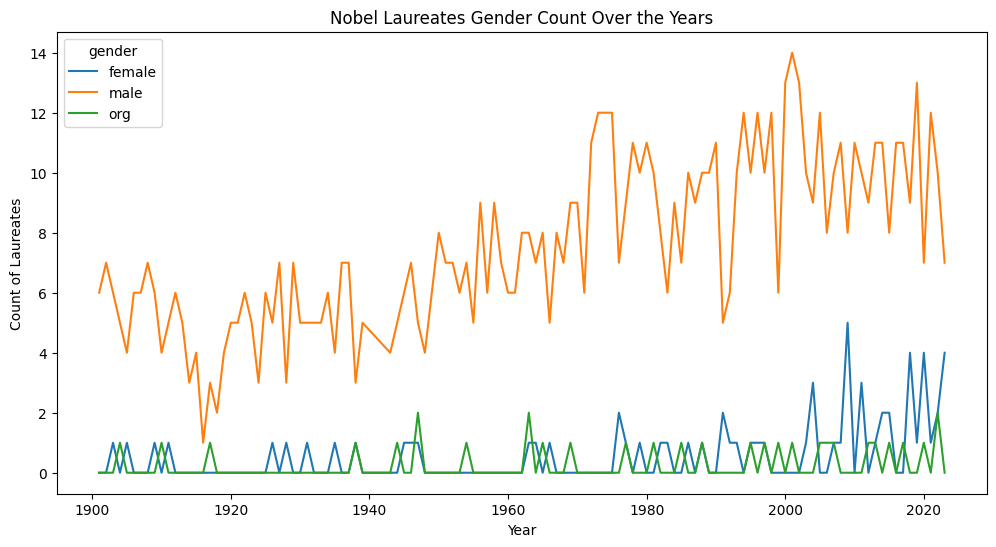

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# Convert 'year' column to numeric for plotting
nobel['year'] = pd.to_numeric(nobel['year'], errors='coerce')

# Grouping by year and gender and counting the number of laureates
gender_count_by_year = nobel.groupby(['year', 'gender']).size().unstack(fill_value=0)

# Plotting the data
gender_count_by_year.plot(kind='line', figsize=(12, 6), title='Nobel Laureates Gender Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Laureates')
plt.show()



```
# This is formatted as code
```

***Question #3***

***Question #4:*** What were the top 5 countries that produced the most Nobel Prize winning Laurets and what was the top type?





In [ ]:
# Group the DataFrame by 'bornCountry' and count the number of laureates for each country
laureates_by_country = nobel.groupby(['bornCountry'])['id'].count().reset_index()

#group and find the most top category per country
category_by_country = nobel.groupby(['bornCountry'])['category'].max().reset_index()

#combine the two querries
combined = pd.merge(laureates_by_country, category_by_country, on='bornCountry', how='outer')

# Find the top 5 countries with the most laureates
top_countries = combined.nlargest(5, 'id')

#set the new column titles
top_countries.columns=['Country of birth','Prize Count','Category']

#print Graph
top_countries.head()


,Country of birth,Prize Count,Category
116,USA,292,physics
120,United Kingdom,90,physics
46,Germany,67,physics
41,France,58,physics
109,Sweden,30,physics


Question #5: At what age did the winners of the Nobel Prize receive their reward?

<ipython-input-7-d3285bfa1ef8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['born'] = pd.to_datetime(age_data['born'], errors='coerce')
<ipython-input-7-d3285bfa1ef8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['age_at_award'] = age_data['year'] - age_data['born'].dt.year


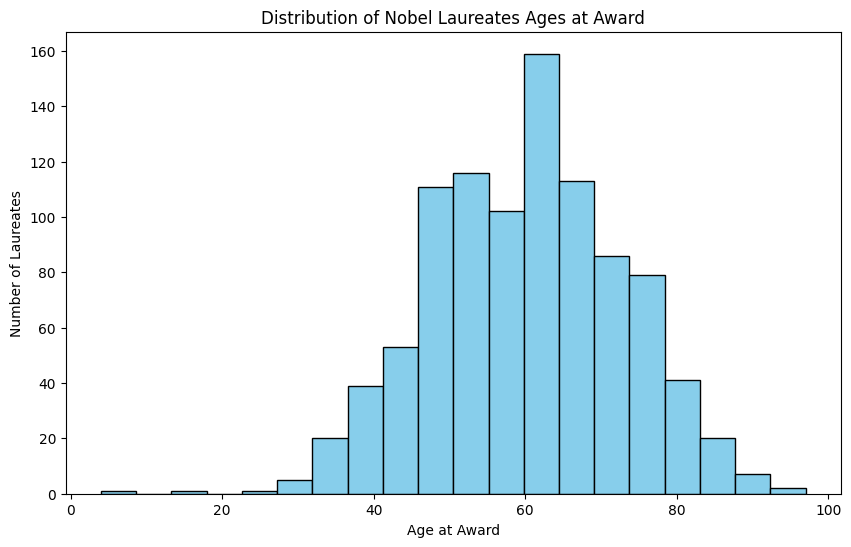

In [ ]:
# Extract relevant columns
age_data = nobel[['born', 'year']]

# Convert birth_date to datetime
age_data['born'] = pd.to_datetime(age_data['born'], errors='coerce')

# Calculate age at the time of receiving the award
age_data['age_at_award'] = age_data['year'] - age_data['born'].dt.year

# Filter out invalid age values, if any
valid_age_data = age_data[age_data['age_at_award'] >= 0]

# Plotting the distribution of ages
plt.figure(figsize=(10, 6))
plt.hist(valid_age_data['age_at_award'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Nobel Laureates Ages at Award')
plt.xlabel('Age at Award')
plt.ylabel('Number of Laureates')
plt.show()


**Question #6: How long has this dataset been maintained for?**



In [ ]:
# Extract the prize year column
prize_years = nobel['year']

# Find the start and end years of the dataset
start_year = prize_years.min()
end_year = prize_years.max()

print(f"The Nobel Prize dataset has been maintained from {start_year} to {end_year}.")

The Nobel Prize dataset has been maintained from 1901 to 2023.
